# Range Search In kd-trees
## Team members : 
1. Kartik Kadur
2. Sayali Barve

In [25]:
import matplotlib.pyplot as plt 
import numpy as np
import math
import random
import kdtree

from plyfile import PlyData, PlyElement

## Read the points from the ply file.

In [ ]:
plyfile = "points_2.ply"
data = PlyData.read(plyfile)
points = list(zip(data.elements[0].data["x"],\
                          data.elements[0].data["y"]))
points = sorted(points, key=lambda x : x[0])
print("Points : \n{}".format(points))

Points : 
[(-100.0, -100.0), (-100.0, 90.0), (0.0, -100.0), (0.0, 0.0), (13.37, 8.15), (43.21, 12.34), (100.0, 100.0), (100.0, -100.0), (120.0, 20.0)]


## Get the center and radius of the circle

In [19]:
center = random.choice([(0.0, 0.0), (100.0, 0.0), (100.0, 100.0), (0.0, 100.0), (150.0, 50.0)])
radius = random.randint(50, 200)
print("Center : {}, Radius : {}".format(center, radius))

Center : (0.0, 100.0), Radius : 50


## Necessary methods

In [20]:
def is_leaf(tree_node):
    """
    Checks if the tree node is a leaf node or not
    """
    if tree_node.left is None and tree_node.right is None:
        return True
    else:
        return False

def is_within_circle(point, center, radius):
    """
    Checks if the tree node is with in the circle.
    """
    if (point[0] - center[0])**2 + (point[1] - center[1])**2 < radius**2:
        return True
    else:
        return False

def distance(p1, p2):
    """
    Calculates distance between two points
    """
    return math.sqrt((p2[0] - p1[0])**2 + (p2[1] - p1[1])**2)

## Nieve approach for finding the rangeß

In [21]:
def neive_approach(center, radius):
    result = []
    for point in points:
        if is_within_circle(point, center, radius):
           result.append(point)
    print("Nevie Approach : \n{}".format(result))
neive_approach(center, radius)

Nevie Approach : 
[]


## Construct a 2d-tree from the points.

In [22]:
class Node:
    def __init__(self, data):
        self.left = None
        self.right = None
        self.data = data


def construct_2d_tree(points):
    """
    Constructs a 2d-search tree from the points given.
    """
    if not points:
        return

    mid = (len(points)) // 2

    root = Node(points[mid])
    root.left = construct_2d_tree(points[:mid])
    root.right = construct_2d_tree(points[mid+1:])

    return root

root = construct_2d_tree(points)
print("Root Node : {}".format(root.data))

Root Node : (13.37, 8.15)


## Range search 2D method

In [23]:
output = []

def range_search_2d(root, center, radius):
    if root is not None:
        if(is_within_circle(root.data, center, radius)):
            output.append(root.data)
        range_search_2d(root.left, center, radius)
        range_search_2d(root.right, center, radius)

range_search_2d(root, center, radius)

neive_approach(center, radius)
print()
print("2d-tree range search : \n{}".format(sorted(output, key=lambda x:x[0])))

Nevie Approach : 
[]

2d-tree range search : 
[]


## Visualization of the points

Center : (0.0, 100.0), Radius : 50


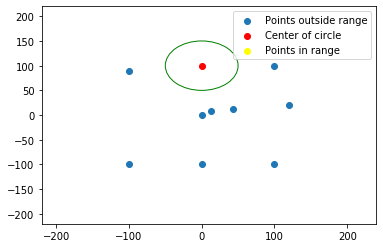

In [24]:
print("Center : {}, Radius : {}".format(center, radius))
fig, ax = plt.subplots()
X, Y = [x[0] for x in points], [x[1] for x in points]
ax.set_xlim((min(X)-max(X), max(X)+max(X)))
ax.set_ylim((min(Y)-max(X), max(Y)+max(X)))

circle = plt.Circle(center, radius, color = "green", fill=False, label = "Circle")
ax.scatter(X, Y, label = "Points outside range")
ax.scatter(center[0], center[1], color = "red", label = "Center of circle")
ax.scatter([x[0] for x in output], [y[1] for y in output], color = "yellow", label = "Points in range")
ax.add_artist(circle)
ax.legend()
plt.show()